In [3]:
def f(x):
    x = x+3
    return x

y = 4
f(y), y

(7, 4)

In [2]:
def flist(x: list):
    for i in range(len(x)):
        x[i] = x[i] + 3
    return x
y = [4]
flist(y), y

([7], [7])

In [9]:
L =[1,2,'alma',3,4]
L[3]

3

In [7]:
V = {3,4,5,6,5}
V

{3, 4, 5, 6}

In [8]:
Vdict = {
    'a': 32,
    'b': 33
}

In [10]:
Vdict['b']

33

In [13]:
x=3; x=x+74; print(x+2)

79


In [70]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import os
from PIL import Image

In [14]:
data = pd.read_csv("D:\ROBOTSTUFF\Wigner-Robot\AI\Arm\Models\parameters.csv", sep=";")

In [15]:
data

,index,comment,learning rate,gamma,epoch,batch size,seed,log interval,optimizer,transform,stepLRsize,loss,test loss,accuracy
0,1,Testing,4.0,0.7,2,100,1,10,Adadelta,Compose( ToTensor() Normalize(mean=(0.13...,1,"[1.618026852607727, 1.5790492296218872, 1.3343...","[0.28963952845670543, 0.30283338581739083]","[96.9955724225174, 98.00759013282732]"


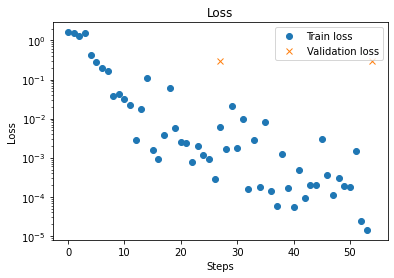

In [59]:
y = eval(data["loss"][0])

plt.yscale("log")
accur_x = len(y) // data["epoch"]
accur_x = accur_x[0]
#print(accur_x)
plt.plot(y, "o", label="Train loss")
plt.plot(np.arange(accur_x, len(y)+1, accur_x), eval(data["test loss"][0]), "x", label="Validation loss")
plt.title("Loss")
plt.xlabel("Steps")
plt.ylabel("Loss")
plt.legend()

In [33]:
eval(data["accuracy"][0])

[96.9955724225174, 98.00759013282732]

In [40]:
np.arange(0, 10, 2)

array([0, 2, 4, 6, 8])

In [43]:
accur_x[0]

27

In [60]:
import random
random.choice(["arrow", "cam", "move"])

'cam'

In [90]:
image_path = 'D:/ROBOTSTUFF/Wigner-Robot/AI/Arm/Learning Data/frames/c0-0013.jpg'
image = Image.open(image_path).convert('L')
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
])
input_tensorr = transform(image.resize((64,48))).unsqueeze(0).to(device)  # Add a batch dimension
input_tensor.shape

target = torch.tensor([1])
target.shape

torch.Size([1])

In [94]:
model_path = 'D:/ROBOTSTUFF/Wigner-Robot/AI/Arm/Models/0003.model'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device ="cpu"
model = torch.jit.load(model_path).to(device)
model.eval()
optimizer = optim.Adadelta(model.parameters(), lr=4)
optimizer.zero_grad()
output = model(input_tensor)
loss = F.nll_loss(output, target)
loss.backward()


In [95]:
model.parameters

<bound method Module.parameters of RecursiveScriptModule(
  original_name=Net
  (conv1): RecursiveScriptModule(original_name=Conv2d)
  (conv2): RecursiveScriptModule(original_name=Conv2d)
  (conv3): RecursiveScriptModule(original_name=Conv2d)
  (dropout1): RecursiveScriptModule(original_name=Dropout)
  (dropout2): RecursiveScriptModule(original_name=Dropout)
  (fc1): RecursiveScriptModule(original_name=Linear)
)>

In [99]:
#print(model.conv3.weight.grad)
model.fc1.weight.grad.shape

torch.Size([5, 15])